In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

In [3]:
aaxn = pd.read_csv('AAXN.csv')
aaxn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-08,0.566770,0.566770,0.562570,0.562570,0.562570,49200
1,2001-06-11,0.566770,0.579080,0.566770,0.570880,0.570880,106800
2,2001-06-13,0.558000,0.571000,0.555000,0.558000,0.558000,94800
3,2001-06-19,0.508333,0.508333,0.460000,0.460000,0.460000,237600
4,2001-06-20,0.458333,0.458333,0.445833,0.445833,0.445833,56400
...,...,...,...,...,...,...,...
4724,2020-03-26,72.639999,77.860001,72.309998,76.519997,76.519997,745700
4725,2020-03-27,73.080002,77.230003,71.870003,74.410004,74.410004,824600
4726,2020-03-30,74.300003,76.360001,69.099998,69.459999,69.459999,1103100
4727,2020-03-31,69.029999,72.720001,67.959999,70.769997,70.769997,1286100


In [4]:
aaxn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4729 non-null   object 
 1   Open       4729 non-null   float64
 2   High       4729 non-null   float64
 3   Low        4729 non-null   float64
 4   Close      4729 non-null   float64
 5   Adj Close  4729 non-null   float64
 6   Volume     4729 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 258.7+ KB


In [9]:
aaxn['Date'] = pd.to_datetime(aaxn['Date'])

In [10]:
print(f'Stock prices between {aaxn.Date.min()} {aaxn.Date.max()}')
print(f'Total days = {(aaxn.Date.max() - aaxn.Date.min()).days} days')

Stock prices between 2001-06-08 00:00:00 2020-04-01 00:00:00
Total days = 6872 days


In [7]:
aaxn.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,4729,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4.729000e+03
mean,2010-11-09 01:42:55.343624704,16.516833,16.858963,16.170788,16.513330,16.513330,2.514949e+06
min,2001-06-08 00:00:00,0.279167,0.291667,0.275000,0.280833,0.280833,3.600000e+03
25%,2006-03-01 00:00:00,4.700000,4.830000,4.600000,4.700000,4.700000,4.708000e+05
50%,2010-11-08 00:00:00,9.450000,9.660000,9.270000,9.420000,9.420000,8.262000e+05
75%,2015-07-22 00:00:00,22.480000,22.840000,22.049999,22.459999,22.459999,1.716200e+06
max,2020-04-01 00:00:00,87.879997,90.099998,87.459999,88.900002,88.900002,1.348276e+08
std,NaN,17.854411,18.201666,17.525604,17.887822,17.887822,7.323146e+06


<Axes: >

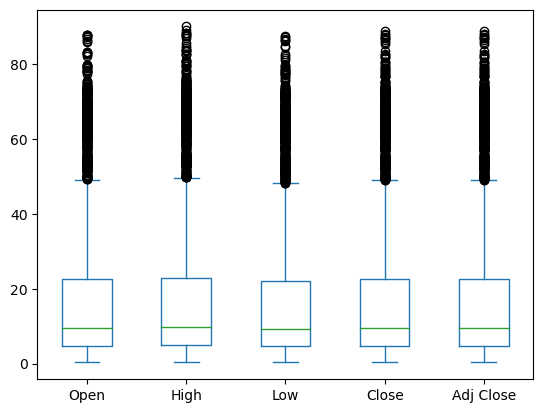

In [8]:
aaxn[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')

<Axes: ylabel='Frequency'>

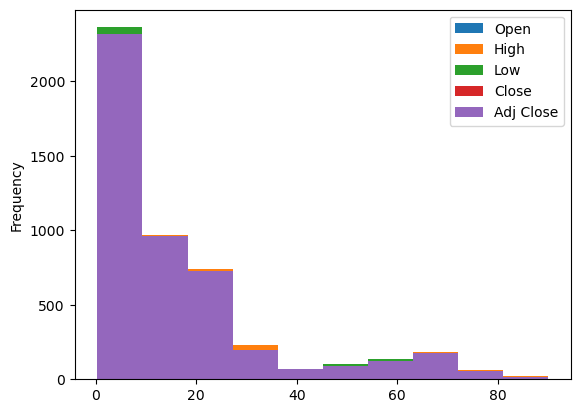

In [9]:
aaxn[['Open','High','Low','Close','Adj Close']].plot(kind = 'hist')  

<Axes: >

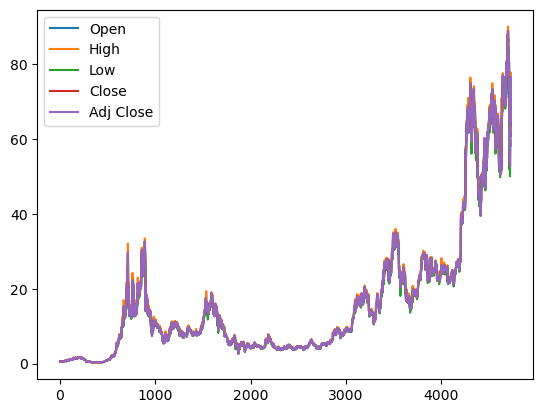

In [10]:
aaxn[['Open','High','Low','Close','Adj Close']].plot(kind = 'line')  

AttributeError: 'DataFrame' object has no attribute 'show'

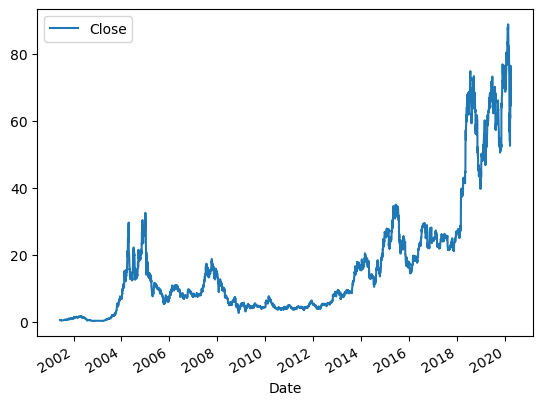

In [11]:
aaxn.plot(kind = 'line', x = 'Date' , y = 'Close')
aaxn.show()

In [35]:
layout = go.Layout(
title = 'Stock Prices of AAXN' ,
            xaxis = dict(
            title = 'Date',
            titlefont = dict (
            family = 'Courier New , monospace' ,
            size = 18 ,
            color =  '#9467bd'
            )
        ),
       yaxis = dict(
       title = 'Price',
       titlefont = dict(
       family = 'Courier New , monospace' ,
            size = 18 ,
            color = '#9467bd'
       )
    )
)

aaxn_data = [{'x' : aaxn['Date'], 'y' :aaxn['Close']}]
plot = go.Figure(data = aaxn_data , layout = layout)

In [36]:
iplot(plot)

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [38]:
X = np.array(aaxn.index).reshape(-1,1)
Y = aaxn['Close']
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 101)


In [39]:
scaler = StandardScaler().fit(X_train)

In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
lm = LinearRegression()
lm.fit(X_train , Y_train) 

LinearRegression()

In [42]:
  trace0 = go.Scatter(
  x = X_train.T[0],
  y = Y_train,
  mode = 'markers' ,
  name = 'Actual'
  )
trace1 = go.Scatter(
  x = X_train.T[0],
     y = lm.predict(X_train).T,
  mode = 'lines' ,
  name = 'Predicted'
)
aaxn_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = aaxn_data, layout = layout)

In [22]:
iplot(plot2)

In [43]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train , lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5178272546200422	0.50383981700783
MSE       158.3517364920914	148.57711206751634

